In [1]:
# opencv 설치
# !pip install opencv-python

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras
cv2.__version__

'4.10.0'

In [24]:
# 모델 가져오기
model = tf_keras.models.load_model('models/mnist-cnn-model.keras')

In [4]:
# VideoCapture : 연결된 웹 캠을 읽어오는 작업
# 카메라가 잘 열려있다면 camera is opened, 아니라면 fail to open camera
# 다 쓴 다음에는 카메라 놔주기 (여기서 잡고있으면 다른데서 못 씀)
cap = cv2.VideoCapture(0)   # 카메라 열기
if cap.isOpened():
    print("camera is opened")
else:
    print("fail to open camera")

cap.release()               # 카메라 닫기

camera is opened


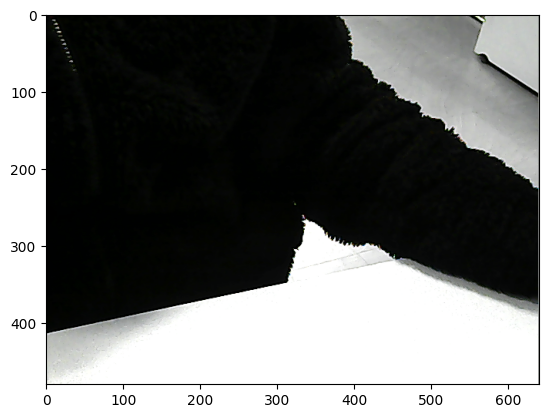

In [25]:
# VideoCapture : 연결된 웹 캠을 읽어오는 작업
cap = cv2.VideoCapture(0)   # 카메라 열기

if cap.isOpened():
    while True:                 # 카메라 연결되고 계속 찍기
        ret, img = cap.read()   # ret 잘 찍었는지 아닌지 판단값, img는 실제 찍힌 이미지
        if ret: # 잘 찍혔다면
            plt.imshow(img)
            plt.show()
            break
else:
    print("fail to open camera")
cap.release()               # 카메라 닫기

In [29]:
# VideoCapture : 연결된 웹 캠을 읽어오는 작업
cap = cv2.VideoCapture(0)   # 카메라 열기

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            
            cv2.imshow('Image', img)
            # 지정한 이름의 창(지금은 Image)을 생성하고 창에 이미지 표시 
            # (같은 이름의 창이 있다면 그 창에 출력함)
            if cv2.waitKey(1)&0xFF == 27:   # ESC key가 눌린 경우
                break
            # ms단위, 1ms 동안 멈춤
else:
    print("fail to open camera")
cap.release()
cv2.destroyAllWindows()

In [5]:
# VideoCapture : 연결된 웹 캠을 읽어오는 작업 - 흑백으로 변환
cap = cv2.VideoCapture(0)   # 카메라 열기

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # 흑백 이미지로 변환

            cv2.imshow('Image', gray_img)
            if cv2.waitKey(1)&0xFF == 27:
                break
else:
    print("fail to open camera")
cap.release()
cv2.destroyAllWindows()

In [ ]:
# VideoCapture : 연결된 웹 캠을 읽어오는 작업 - 흑백으로 변환
cap = cv2.VideoCapture(0)   # 카메라 열기

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            threshold, bin_img = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY)
            # 110 기준으로 경계치 만들기(임계치는 110, 임계치 넘은 색은 255로 표시). 
            # 흑백으로 들어온 이미지 반전 > 흰색 아니면 검은색 뿐
            cv2.imshow('Image', bin_img)
            if cv2.waitKey(1)&0xFF == 27:
                break
else:
    print("fail to open camera")
cap.release()
cv2.destroyAllWindows()

In [7]:
# VideoCapture : 연결된 웹 캠을 읽어오는 작업 - 흑백으로 변환 - 흑백을 반전
cap = cv2.VideoCapture(0)   # 카메라 열기

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # 이미지 이진화 (흑백으로 대비)
            threshold, bin_img = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY_INV) 
            # 이미지 이진화 (흑백으로 대비)
            # THRESH_BINARY_INV > 흰색 검은색 반전

            cv2.imshow('Image', bin_img)
            if cv2.waitKey(1)&0xFF == 27:
                break
else:
    print("fail to open camera")
cap.release()
cv2.destroyAllWindows()

In [8]:
# VideoCapture : 연결된 웹 캠을 읽어오는 작업 - 흑백으로 변환 - 흑백을 반전
cap = cv2.VideoCapture(0)

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # 흑백 이미지로 변환
            threshold, bin_img = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY_INV)

            contours, hierachy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            # 경계영역(경계선) 찾기 
            # EXTERNAL:외곽 경계선 찾기, CHAIN_APPROX_SIMPLE:윤곽선을 근사화하는 작업

            cv2.imshow('Image', bin_img)
            if cv2.waitKey(1)&0xFF == 27:
                break
else:
    print("fail to open camera")
cap.release()
cv2.destroyAllWindows()

In [17]:
# VideoCapture : 연결된 웹 캠을 읽어오는 작업 - 흑백으로 변환 - 흑백을 반전 - for문 사용
cap = cv2.VideoCapture(0)

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            threshold, bin_img = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY_INV)

            contours, hierachy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contour in contours:
                (x, y), radius = cv2.minEnclosingCircle(contour)    
                # 좌표값(x, y)과 반지름 주고, 경계영역을 포함하는 가장 작은 원 찾기
                if radius > 3:
                    # 3을 초과하는 반지름으로 설정
                    # 원으로부터 사각형 정보 도출, 좌하에서 우상으로 가는 좌표체계 (좌상 우하로가는 체계도 있음)
                    xs, xe = int(x-radius), int(x+radius)
                    ys, ye = int(y-radius), int(y+radius)
                    cv2.rectangle(bin_img, (xs, ys), (xe, ye), (200, 0, 0), 1)
                    # 이미지에 사각형 그리기. 200 > RGB니까 빨간선이고, 1은 선 두께
                    # 레드로 넣었지만 색상값이 흑, 백이라서 빨간색으로 안 나옴
                pass

            cv2.imshow('Image', bin_img)
            if cv2.waitKey(1)&0xFF == 27:
                break
else:
    print("fail to open camera")
cap.release()
cv2.destroyAllWindows()

In [29]:
# 이제 할 것은 모델에 사각형 정보 넣기
# 종이에 숫자 쓰고 카메라로 인식해서 모델에 넣고 무슨 숫자인지 찾아보기
cap = cv2.VideoCapture(0)

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            threshold, bin_img = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY_INV)

            contours, hierachy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contour in contours:
                (x, y), radius = cv2.minEnclosingCircle(contour)    
                if radius > 3:
                    xs, xe = int(x-radius), int(x+radius)
                    ys, ye = int(y-radius), int(y+radius)
                    cv2.rectangle(bin_img, (xs, ys), (xe, ye), (200, 0, 0), 1)

                    roi = bin_img[ys:ye, xs:xe] # 사각형 영역 추출
                    if roi.shape[0] == 0 or roi.shape[1] == 0:
                        continue
                    dst = cv2.resize(roi, dsize=(50, 50), interpolation=cv2.INTER_LINEAR) # interpolation: 빈공간을 메꾸기
                    dst = cv2.resize(dst, dsize=(26, 26), interpolation=cv2.INTER_AREA)
                    input = np.zeros((28, 28)) # 모델에 입력할 이미지 크기
                    input[1:-1, 1:-1], dst[:, :]
                    # 26 26 이미지를 중앙에 위치 시키기 위함
                    # 상, 하, 좌, 우 각 1줄씩 0으로 채워
                    input = input.reshape((-1, 28, 28, 1))

                    output = model.predict(input)   # 예측모델에 이미지를 통과시켜서 예측 수행
                    digit = output.argmax()         # 예측 결과에서 CLASS 값 찾기
                    cv2.putText(bin_img, str(digit), (xs, ys), cv2.FONT_ITALIC, 2, (200, 0, 0))
                    
            cv2.imshow('Image', bin_img)
            if cv2.waitKey(1)&0xFF == 27:
                break
else:
    print("fail to open camera")
cap.release()
cv2.destroyAllWindows()
# 뭔가 인식 오류 있음

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/s

In [ ]:
# 이제 할 것은 모델에 사각형 정보 넣기
# 종이에 숫자 쓰고 카메라로 인식해서 모델에 넣고 무슨 숫자인지 찾아보기
cap = cv2.VideoCapture(0)

if cap.isOpened():
    while True:
        ret, img = cap.read()
        if ret:
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            threshold, bin_img = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY_INV)

            contours, hierachy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for contour in contours:
                (x, y), radius = cv2.minEnclosingCircle(contour)    
                if radius > 3:
                    xs, xe = int(x-radius), int(x+radius)
                    ys, ye = int(y-radius), int(y+radius)
                    cv2.rectangle(bin_img, (xs, ys), (xe, ye), (200, 0, 0), 1)

                    roi = bin_img[ys:ye, xs:xe] # 사각형 영역 추출
                    if roi.shape[0] == 0 or roi.shape[1] == 0:
                        continue
                    dst = cv2.resize(roi, dsize=(50, 50), interpolation=cv2.INTER_LINEAR) # interpolation: 빈공간을 메꾸기
                    dst = cv2.resize(dst, dsize=(26, 26), interpolation=cv2.INTER_AREA)
                    input = np.zeros((28, 28)) # 모델에 입력할 이미지 크기
                    input[1:-1, 1:-1] = dst[:, :]
                    # 26 26 이미지를 중앙에 위치 시키기 위함
                    # 상, 하, 좌, 우 각 1줄씩 0으로 채워
                    input = input.reshape((-1, 28, 28, 1))

                    output = model.predict(input)   # 예측모델에 이미지를 통과시켜서 예측 수행
                    digit = output.argmax()         # 예측 결과에서 CLASS 값 찾기
                    cv2.putText(bin_img, str(digit), (xs, ys), cv2.FONT_ITALIC, 2, (200, 0, 0))

            cv2.imshow('Image', bin_img)
            if cv2.waitKey(1)&0xFF == 27:
                break
else:
    print("fail to open camera")
cap.release()   # 맥을 쓸 경우 잘 안 닫힐 수 있어 여러번 해주면 된다.
cap.release()
cap.release()
cap.release()
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 